# News Mood

In [18]:
#import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
None

In [12]:
#configure analyzer and tweepy
analyzer = SentimentIntensityAnalyzer()
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [13]:
#Gather Tweet Data
outlets = ["@BBCWorld", "@CBSNews","@CNN", "@FoxNews", "@NYtimes"]
data = []

In [14]:
#Loop through each outlet to gather tweet data
for outlet in outlets:
    # Variable for holding the oldest tweet
    oldest_tweet = None
    
    counter = 1
    
    # Get 100 tweets - 20 per page
    for x in range (1,5):
        outlet_tweets = api.user_timeline(outlet, page=x)
        
        #loop through each tweet to analyze sentiment and store variables into a list
        for x in outlet_tweets:
            date = x["created_at"]
            text = x["text"]
            tweets_ago = counter
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            neu = sentiment["neu"]
            pos = sentiment["pos"]
            neg = sentiment["neg"]
            data.append([outlet, date, compound, pos, neu, neg, text, tweets_ago])
            
            counter += 1


In [15]:
#Create a DataFrame with all of the tweet data
df = pd.DataFrame(data)
df = df.rename(index =str,columns ={0:"outlet",1:"Date",2:"Compound Score",3:"Positive", 6:"Tweet", 7:"Tweets Ago", 5:"negative", 4:"Neutral"})
df.head()

,outlet,Date,Compound Score,Positive,Neutral,negative,Tweet,Tweets Ago
0,@BBCWorld,Sun Jun 10 01:58:31 +0000 2018,0.00,0.000,1.000,0.0,Deadly stabbing on Japan bullet train https://...,1
1,@BBCWorld,Sun Jun 10 01:44:19 +0000 2018,0.00,0.000,1.000,0.0,'Blood and money': The story of the Koch broth...,2
2,@BBCWorld,Sun Jun 10 01:39:52 +0000 2018,0.00,0.000,1.000,0.0,World record set for largest skinny dip on Co ...,3
3,@BBCWorld,Sun Jun 10 01:37:26 +0000 2018,0.25,0.154,0.846,0.0,Sabrina Simader: 'I realised my Winter OIympic...,4
4,@BBCWorld,Sun Jun 10 01:25:49 +0000 2018,0.00,0.000,1.000,0.0,Serial poopers: What makes people poo in publi...,5


In [16]:
#Pivot the data frame so the outlets are the column titles 
plt_df = df[["outlet","Compound Score","Tweets Ago"]]
plt_df = plt_df.pivot(index = "Tweets Ago", values = "Compound Score", columns = "outlet")
plt_df.head()

outlet,@BBCWorld,@CBSNews,@CNN,@FoxNews,@NYtimes
Tweets Ago,,,,,
1,0.00,-0.1154,0.6486,0.0000,-0.2263
2,0.00,0.5719,0.5390,0.0000,0.0000
3,0.00,-0.8481,0.0000,-0.3400,-0.0772
4,0.25,0.5574,-0.6486,-0.7579,-0.7906
5,0.00,0.2960,0.5859,0.4678,0.6705


# Graph Time

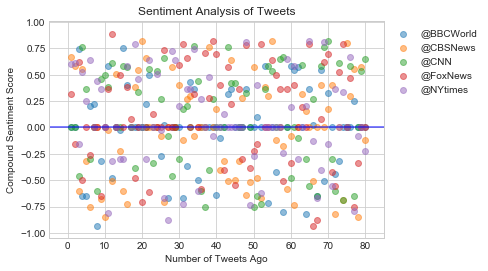

In [47]:
import numpy as np
x = np.arange(80, 0, -1)

plt.scatter(x, plt_df['@BBCWorld'], alpha=0.5)
plt.scatter(x, plt_df['@CBSNews'], alpha=0.5)
plt.scatter(x, plt_df['@CNN'], alpha=0.5)
plt.scatter(x, plt_df['@FoxNews'], alpha=0.5)
plt.scatter(x, plt_df['@NYtimes'], alpha=0.5)

plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Number of Tweets Ago')
plt.ylabel('Compound Sentiment Score')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(-5,85)
plt.axhline(linewidth=2, color='b', alpha =.5)
plt.savefig("outputs/scatterplot.png")

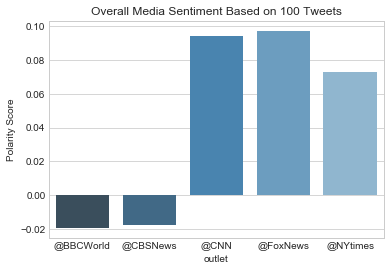

In [46]:
height = plt_df.mean()
sns.set_style("whitegrid")
sns.barplot(height.index, height, palette="Blues_d").set_title("Overall Media Sentiment Based on 100 Tweets")
plt.ylabel("Polarity Score")
plt.savefig("outputs/bargarph.png")
None

# Observable Trends 

- A large amount of the tweets are analyzed with a zero polarity score, which makes me think that either the sentiment analyzer has trouble analyzing certain tweets, or the news is very neutral in tone. 
- While,  CNN, Fox and the NyTimes all lean positive in polarity, it is only .1 over neutral. so while the graph makes it look like they are more positive than BBC and CBS, they are only about .08 higher. 
- There doesn't seem to be any relation between tweets from the various outlets to each other. It would be interesting to compare outlets tone on corresponding stories. 